In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
import time
import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
dirdata1='0_img/'
dirdata2='1_img/'
dirdata3='2_img/'
dirdata4='3_img/'

In [3]:
def data_img(dirdata1,dirdata2,dirdata3,dirdata4):
    data = [] # 1 step
    label = []
    height=120
    BLACK = [0,0,0]
    for i in os.listdir(dirdata1): # 2 step
        img = cv2.imread(dirdata1+i)
        x,y,z = img.shape
        if x<=height:
            constant = cv2.copyMakeBorder(img,0,height-x,0,0,cv2.BORDER_CONSTANT,value=BLACK)
        data.append(constant) # 2-2 
        label.append(0) # 2-3
    for i in os.listdir(dirdata2):
        img = cv2.imread(dirdata2+i)
        x,y,z = img.shape
        if x<=height:
            constant = cv2.copyMakeBorder(img,0,height-x,0,0,cv2.BORDER_CONSTANT,value=BLACK)
        data.append(constant) # 2-2 
        label.append(1) # 2-3
        
    for i in os.listdir(dirdata3):
        img = cv2.imread(dirdata3+i)
        x,y,z = img.shape
        if x<=height:
            constant = cv2.copyMakeBorder(img,0,height-x,0,0,cv2.BORDER_CONSTANT,value=BLACK)
        data.append(constant) # 2-2 
        label.append(2) # 2-3
        
    for i in os.listdir(dirdata4):
        img = cv2.imread(dirdata4+i)
        x,y,z = img.shape
        if x<=height:
            constant = cv2.copyMakeBorder(img,0,height-x,0,0,cv2.BORDER_CONSTANT,value=BLACK)
        data.append(constant) # 2-2 
        label.append(3) # 2-3
        
    data = np.array(data) # 3
    label = np.array(label) #3

    label_one_hot = np.eye(4)[label] # 4 one-hot encoding

    data_norm = data / 255 #5
    return data_norm,label_one_hot

In [4]:
data, label=data_img(dirdata1,dirdata2,dirdata3,dirdata4)

In [5]:
label

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data, label, test_size=0.8, random_state=42)

In [7]:
X_train.shape

(122, 120, 50, 3)

In [8]:
model = Sequential()  
model.add(Conv2D(filters=16,  kernel_size=(5,5),  padding='same',  input_shape=(data.shape[1],data.shape[2],data.shape[3]),  activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 50, 16)       1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 25, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 24000)             0         
                                                                 
 dense (Dense)               (None, 64)                1536064   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                        

In [10]:
# 定義訓練方式  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

start_time = time.time()
# 開始訓練  
train_history = model.fit(X_train,Y_train,validation_split=0.2,epochs=100, batch_size=30, verbose=1)
end_time = time.time()

Epoch 1/100
4/4 [==============================] - 2s 62ms/step - loss: 3.0600 - accuracy: 0.3093 - val_loss: 2.0389 - val_accuracy: 0.5600
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 1.5665 - accuracy: 0.5670 - val_loss: 0.6739 - val_accuracy: 0.8400
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.9121 - accuracy: 0.5979 - val_loss: 0.6021 - val_accuracy: 0.8000
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.5430 - accuracy: 0.7835 - val_loss: 0.7691 - val_accuracy: 0.7200
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.4398 - accuracy: 0.8660 - val_loss: 0.5770 - val_accuracy: 0.7600
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.3700 - accuracy: 0.8144 - val_loss: 0.3960 - val_accuracy: 0.8800
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2950 - accuracy: 0.9381 - val_loss: 0.3951 - val_accuracy: 0.8800
Epoch 8/100
4/4 [========

4/4 [==============================] - 0s 9ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.4115 - val_accuracy: 0.8800
Epoch 60/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4160 - val_accuracy: 0.8800
Epoch 61/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4292 - val_accuracy: 0.8800
Epoch 62/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4409 - val_accuracy: 0.8800
Epoch 63/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4510 - val_accuracy: 0.8800
Epoch 64/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.4910 - val_accuracy: 0.9200
Epoch 65/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5161 - val_accuracy: 0.9200
Epoch 66/100
4/4 [===============

In [11]:
execution_time = (end_time - start_time)
print("執行時間: ",execution_time,"s")

執行時間:  5.4112114906311035 s


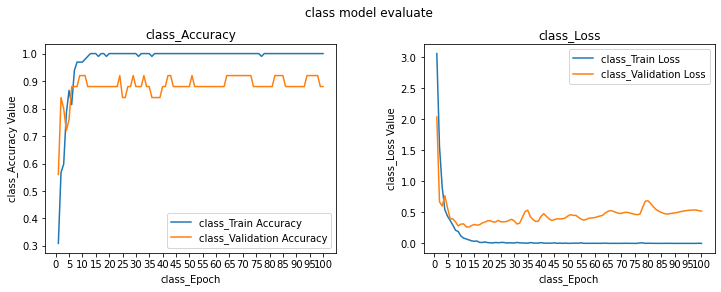

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('class model evaluate', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

class_epoch_list = list(range(1,101))
ax1.plot(class_epoch_list, train_history.history['accuracy'], label='class_Train Accuracy')
ax1.plot(class_epoch_list, train_history.history['val_accuracy'], label='class_Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))
ax1.set_ylabel('class_Accuracy Value')
ax1.set_xlabel('class_Epoch')
ax1.set_title('class_Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(class_epoch_list, train_history.history['loss'], label='class_Train Loss')
ax2.plot(class_epoch_list, train_history.history['val_loss'], label='class_Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))
ax2.set_ylabel('class_Loss Value')
ax2.set_xlabel('class_Epoch')
ax2.set_title('class_Loss')
l2 = ax2.legend(loc="best")

In [13]:
#model.save('2d_cnn_4class.h5')

In [34]:
modello = keras.models.load_model('2d_cnn_4class.h5')

In [13]:
time_pre=model.predict(X_test,verbose=2)

16/16 - 0s - 111ms/epoch - 7ms/step


In [14]:
Y_test = np.argmax(Y_test,axis=1)
Y_pred = np.argmax(time_pre,axis=1)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       247
           1       0.97      0.42      0.59        69
           2       0.98      0.96      0.97       127
           3       0.88      0.91      0.90        47

    accuracy                           0.90       490
   macro avg       0.92      0.82      0.84       490
weighted avg       0.91      0.90      0.88       490



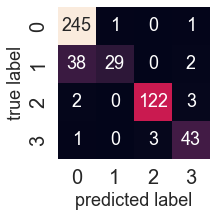

In [15]:
mat = confusion_matrix(Y_test,Y_pred)

sns.set(font_scale=1.5)
plt.subplot(1,2,1)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylabel('true label')
plt.xlabel('predicted label');

target_names = ["0","1","2","3"]
print(classification_report(Y_test,Y_pred,target_names=target_names))